NAME: M.N.F.NIFLA                    
INDEX NO: 190413D


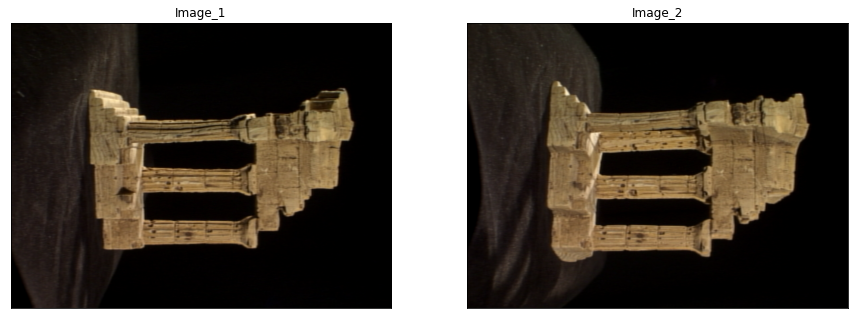

In [26]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

f = open(r'./Images/templeSparseRing/templeSR_par.txt', 'r')
assert f is not None

n = int(f.readline())
l = f.readline().split()
im1_fn = l[0]

K1 = np.array([float(i) for i in l[1:10]]).reshape((3,3))
R1 = np.array([float(i) for i in l[10:19]]).reshape((3,3))
t1 = np.array([float(i) for i in l[19:22]]).reshape((3,1))

# Reading info on the second image
l = f.readline().split()
im2_fn = l[0]
K2 = np.array([float(i) for i in l[1:10]]).reshape((3,3))
R2 = np.array([float(i) for i in l[10:19]]).reshape((3,3))
t2 = np.array([float(i) for i in l[19:22]]).reshape((3,1))

# Read the two images and show
im1 = cv.imread(r'Images/templeSparseRing/'+im1_fn, cv.IMREAD_COLOR)
im2 = cv.imread(r'Images/templeSparseRing/'+im2_fn, cv.IMREAD_COLOR)
assert im1 is not None
assert im2 is not None
# cv.namedWindow('Im')
# cv.imshow('Im', im1)
# cv.waitKey(0)
# cv.imshow('Im', im2)
# cv.waitKey(0)
# cv.destroyAllWindows()

fig, ax = plt.subplots(1,2, sharex='all', sharey='all',figsize=(15,15))
ax[0].imshow(cv.cvtColor(im1,cv.COLOR_BGR2RGB))
ax[0].set_title("Image_1")
ax[0].set_xticks([]) , ax[0].set_yticks([])
ax[1].imshow(cv.cvtColor(im2,cv.COLOR_BGR2RGB))
ax[1].set_title("Image_2")
ax[1].set_xticks([]) , ax[1].set_yticks([])
plt.show()

#compute P1 and P2
P1 = K1 @ np.hstack((R1,t1))
P2 = K2 @ np.hstack((R2,t2)) # P=k+[R|t]

#Compute F


In [27]:
from scipy.linalg import null_space
def skew(x):
    x = x.ravel()
    return np.array([[0, -x[2], x[1]], [x[2],0,x[0]], [-x[1],x[0],0]])

C = null_space(P1)
C = C*np.sign(C[0,0])
e2 = P2 @ C
e2x = skew(e2)

F = e2x @ P2 @ np.linalg.pinv(P1)
print(F)

[[-2.87071497e-04 -3.96261289e-02  2.94221686e+02]
 [-3.51667034e-02  9.22573767e-03 -1.81801579e+01]
 [-2.76702814e+02  2.12942175e+01 -9.06669374e+03]]


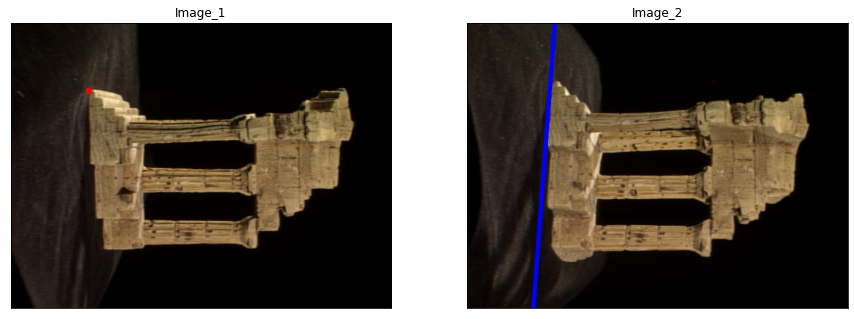

In [30]:
x = np.array([130, 115, 1])
cv.circle(im1, (x[0], x[1]), 5, (0, 0, 255), -1)
l2 = F @ x.T

p1 = np.array([0, (l2[0]*0 + l2[2])/l2[1]]).astype(int)
p2 = np.array([500, (l2[0]*500 + l2[2])/l2[1]]).astype(int)
cv.line(im2, (p1[0],p1[1]), (p2[0],p2[1]),(255,0,0),5)

# cv.namedWindow('Im')
# cv.imshow('Im', im1)
# cv.waitKey(0)
# cv.namedWindow('Im')
# cv.imshow('Im', im2)
# cv.waitKey(0)
# cv.destroyAllWindows()

fig, ax = plt.subplots(1,2, sharex='all', sharey='all',figsize=(15,15))
ax[0].imshow(cv.cvtColor(im1,cv.COLOR_BGR2RGB))
ax[0].set_title("Image_1")
ax[0].set_xticks([]) , ax[0].set_yticks([])
ax[1].imshow(cv.cvtColor(im2,cv.COLOR_BGR2RGB))
ax[1].set_title("Image_2")
ax[1].set_xticks([]) , ax[1].set_yticks([])
plt.show()


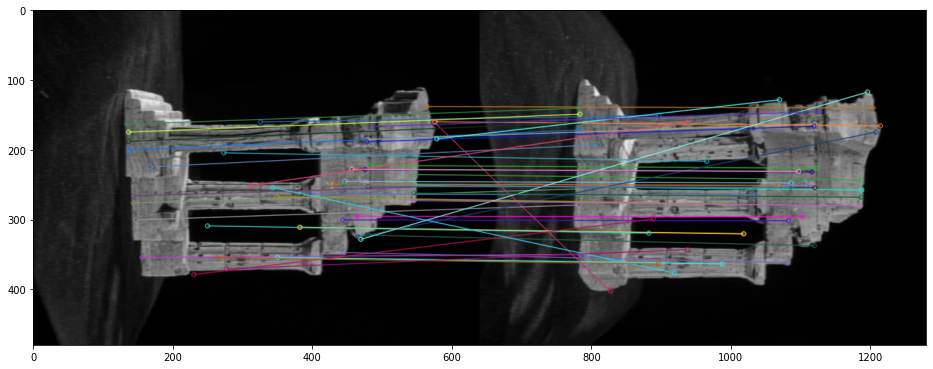

In [42]:
import cv2

# read the images
img1 = cv2.imread('Images/templeSparseRing/templeSR0001.png')  
img2 = cv2.imread('Images/templeSparseRing/templeSR0002.png')
assert img1 is not None
# convert images to grayscale
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
# create SIFT object
sift = cv2.SIFT_create()
# detect SIFT features in both images
keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

# create feature matcher
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
# match descriptors of both images
matches = bf.match(descriptors_1,descriptors_2)

# sort matches by distance
matches = sorted(matches, key = lambda x:x.distance)
# draw first 50 matches
matched_img = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)

# # show the image
# cv2.imshow('image', matched_img)
# # save the image
# cv2.imwrite("matched_images.jpg", matched_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

fig = plt.figure(figsize=(16,10))
plt.imshow(matched_img)

